# Time to inspect

12
| 0.00, 0.00, 111.03|
| 0.00,-0.00,-2.66|
| 0.00, 0.00, 1.00|
Band 1


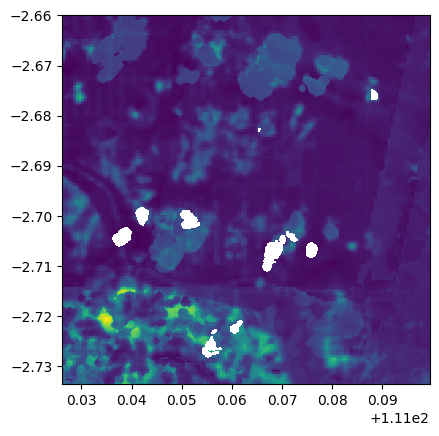

Band 2


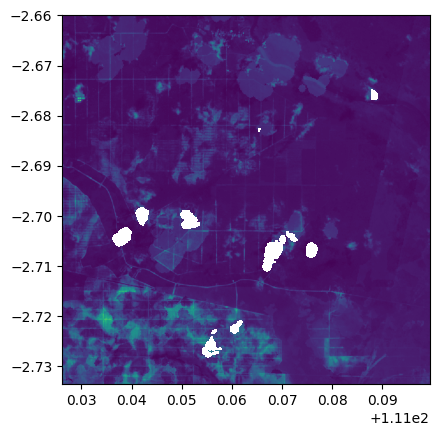

Band 3


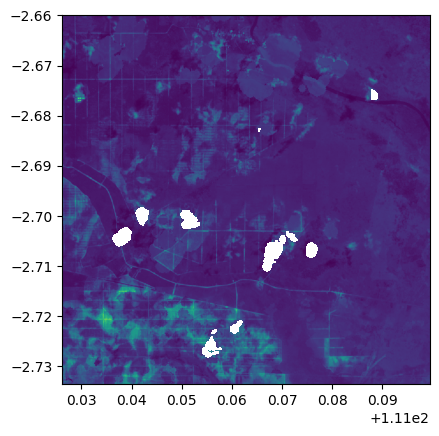

Band 4


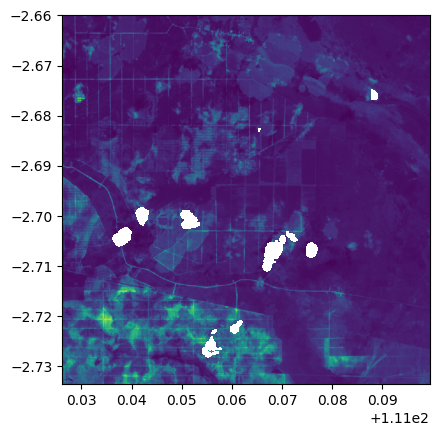

Band 5


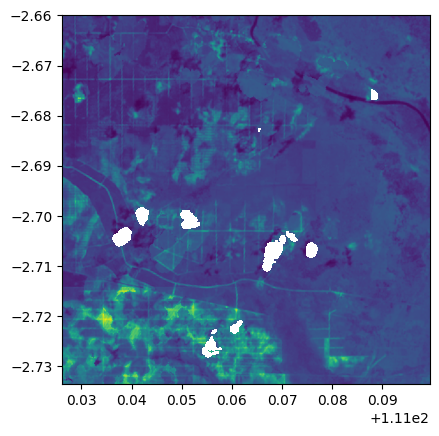

Band 6


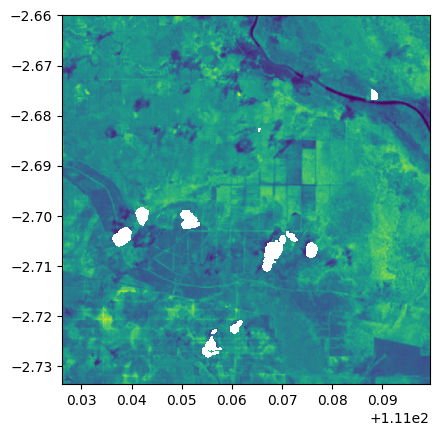

Band 7


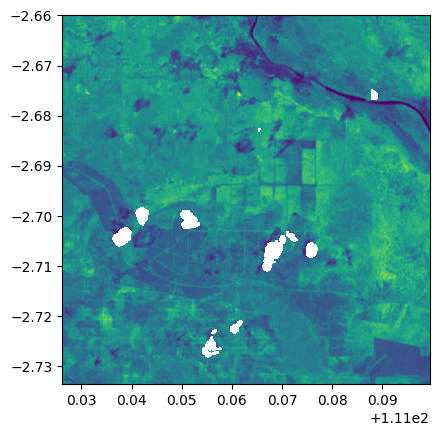

Band 8


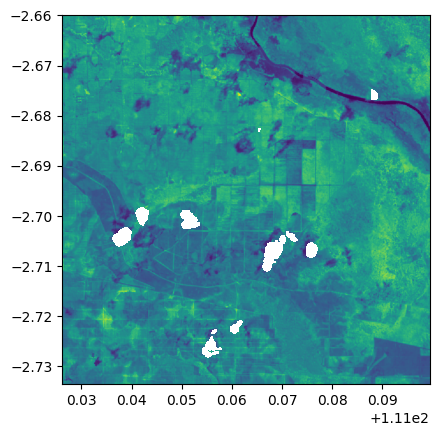

Band 9


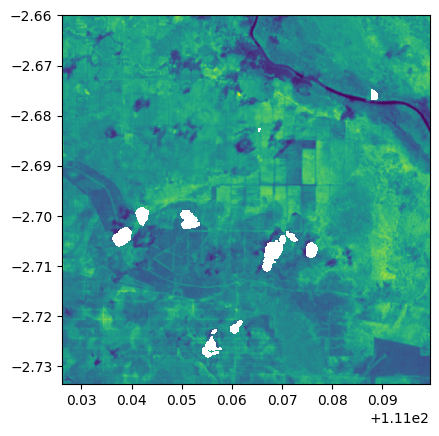

Band 10


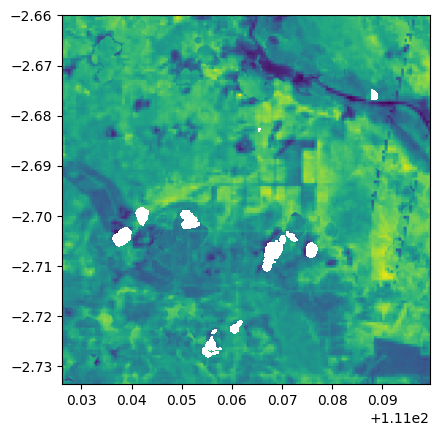

Band 11


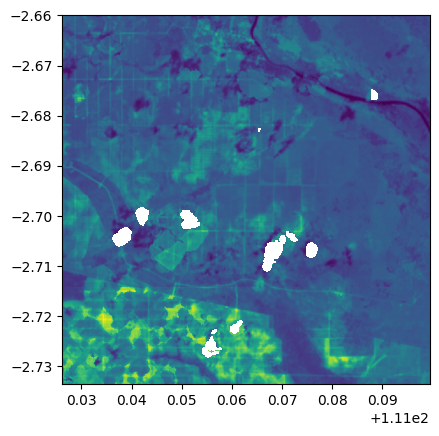

Band 12


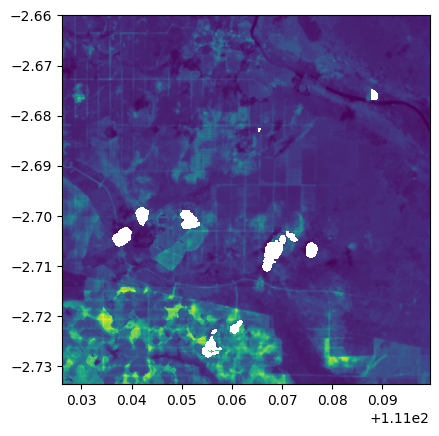

In [143]:
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Suppose all 12 bands are in one multi-band TIFF, e.g. "sentinel2_mosaic.tif"
with rasterio.open("./train_images/train_0.tif") as src:
    print(src.count)          # Number of bands (should be 12 if all in one file)
    print(src.transform)      # Affine transform (georeferencing)
    
    for i in range(1, src.count + 1): 
        # Read a single band (for example, band 4 = Red)
        bandi = src.read(i)
        print("Band", i)
        # Quick visualization of a single band
        show(bandi, transform=src.transform)

    # Quick RGB plot
    # Rasterio expects (band, row, column), so if you read in [4,3,2], 
    # it's shape = (3, height, width)
    # Transpose it to (height, width, band) for plt.imshow()

In [ ]:
with rasterio.open('./train_images/train_0.tif') as src:
    # Read all bands into a numpy array
    # print(src.bounds) printer bounding box
    print(src)
    
    src_methods = dir(src)

    print(src.meta)

    #show(src)
    #print(src.stats()) # lager ny xml fil med statestikk
    #print(src.transform) #hva gjør dette?
    #print(src.tags())
    #print(src.profile)
    #print(src.lnglat()) #longitudes and latitudes
    #print(src.index(0, 0)) # hva gjør dette?
    #print(src.xy(0, 0)) # hva gjør dette?
    #print(src.bounds) # hva gjør dette?
    #print(src.checksum(1)) # hva gjør dette?

In [199]:
with rasterio.open('./train_images/train_0.tif') as src:
    print(src.read().shape)
    print()

(12, 1024, 1024)



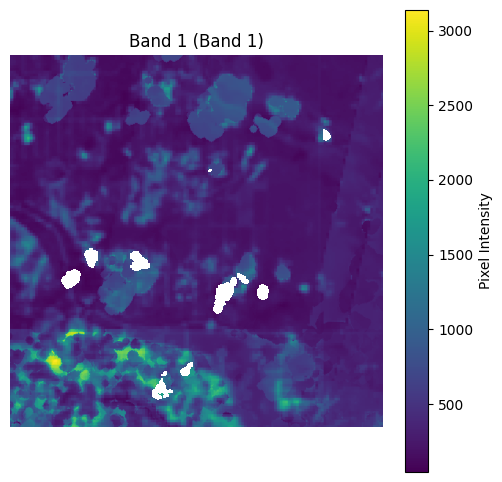

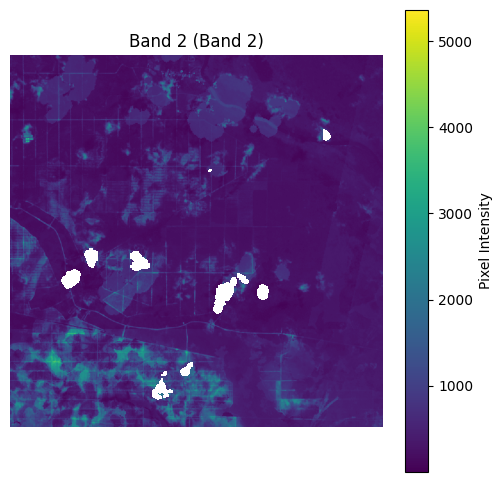

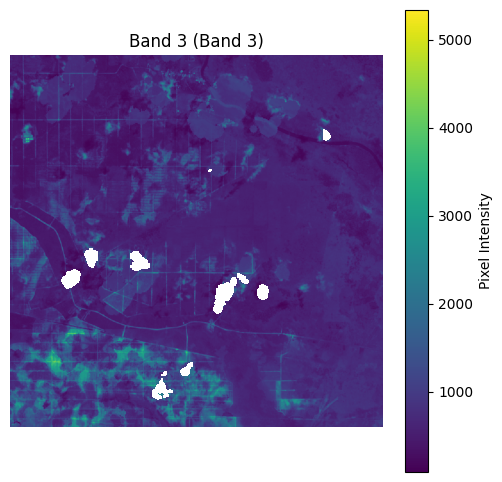

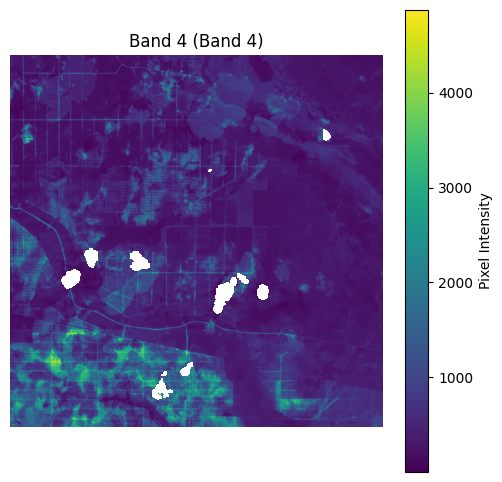

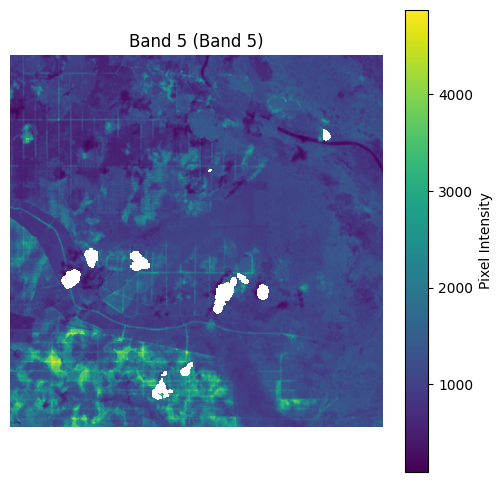

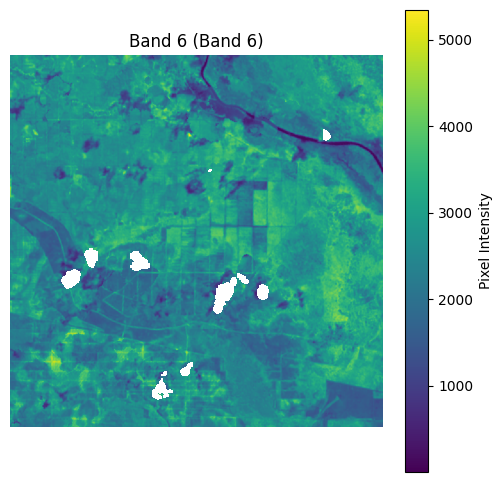

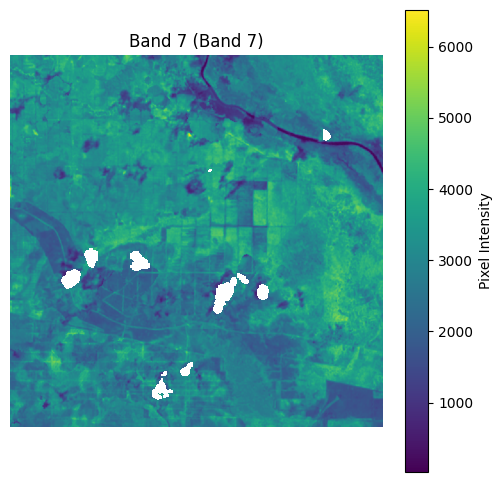

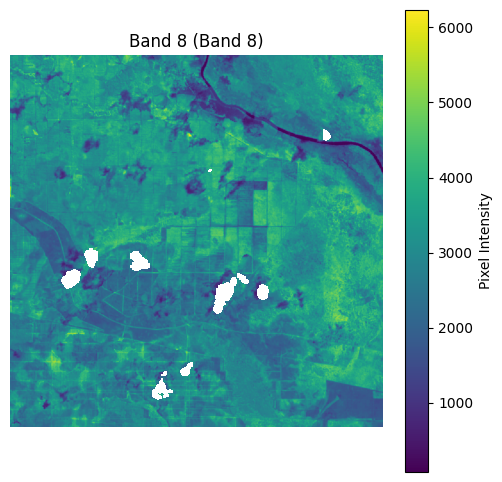

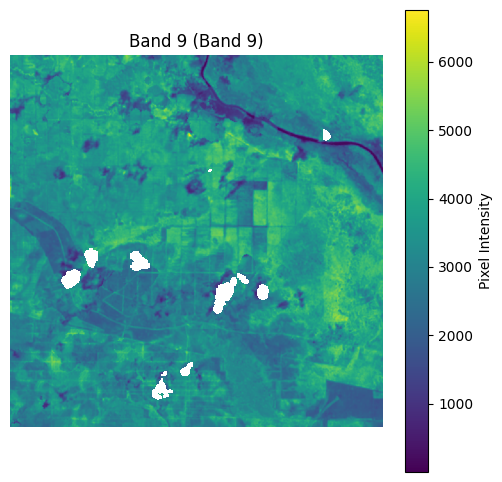

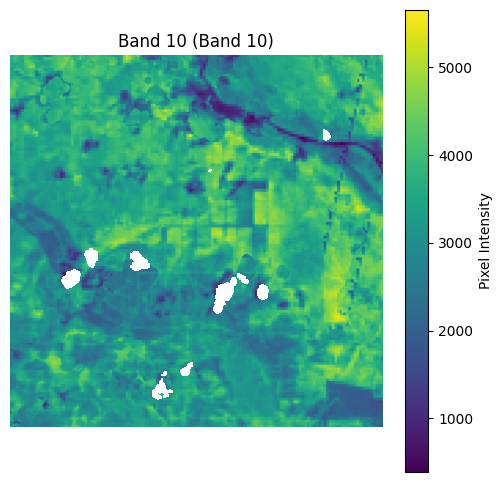

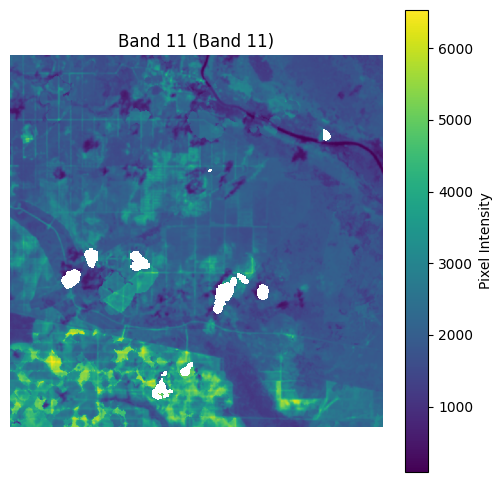

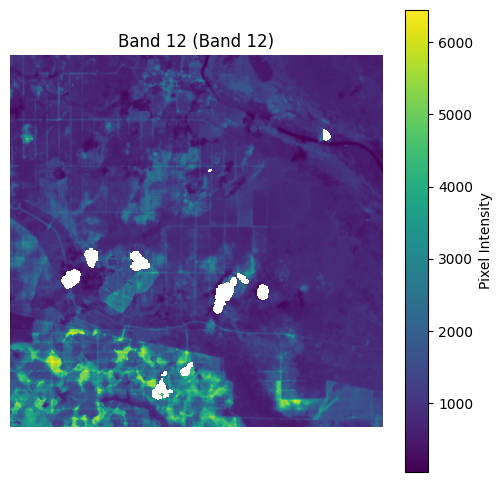

In [198]:
import matplotlib.pyplot as plt
import numpy as np

# Load the TIF file and visualize bands and RGB
with rasterio.open('./train_images/train_0.tif') as src:
    # Read all bands into a numpy array
    bands_data = src.read()
    profile = src.profile

# Visualize individual bands
def plot_band(band, index, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(band)
    plt.title(f"{title} (Band {index})")
    plt.axis("off")
    plt.colorbar(label="Pixel Intensity")
    plt.show()

# Display each band individually
for i, band in enumerate(bands_data, start=1):
    plot_band(band, i, f"Band {i}")


In [231]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from rasterio.plot import show
import json

# Load the annotation JSON
annotation_path = './data/train_annotation.json'
with open(annotation_path, 'r') as file:
    annotations = json.load(file)

train_images_path = './data/train_images/'
file_name =  'train_0.tif'

# Access data
image_annotations = None
for elem in annotations["images"]:
    if elem["file_name"] == file_name:
        image_annotations = elem["annotations"]
        break


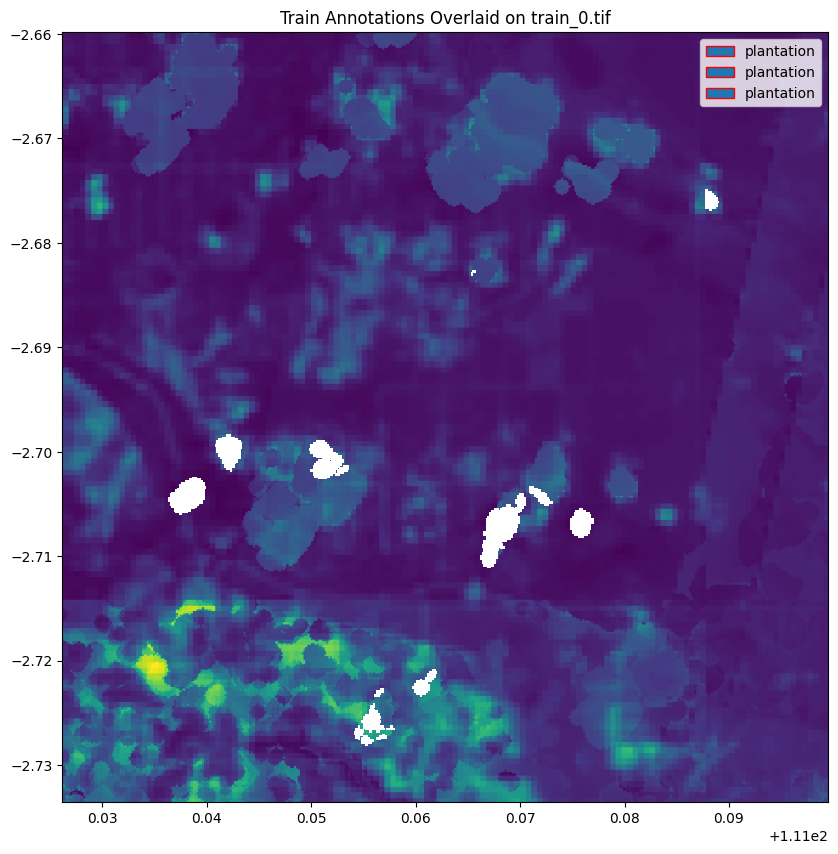

In [237]:

# Plot the TIFF file and overlay polygons
if image_annotations:
    with rasterio.open(train_images_path + file_name) as src:
        fig, ax = plt.subplots(figsize=(10, 10))
        show(src, ax=ax)
        
        for annotation in image_annotations:
            class_name = annotation['class']
            segmentation = annotation['segmentation']
            
            # Convert segmentation points into a (x, y) coordinate list
            coords = [(segmentation[i], segmentation[i+1]) for i in range(0, len(segmentation), 2)]
            polygon = Polygon(coords, edgecolor='red', label=class_name)
            ax.add_patch(polygon)
        
        plt.legend()
        plt.title(f'Train Annotations Overlaid on {file_name}')
        plt.show()
else:
    print(f'No annotations found for {file_name}.')
